<a href="https://colab.research.google.com/github/robertocannella/AnnArborTemps/blob/main/AnnArborTemps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.axis import Axis 
import numpy as np
import pandas as pd

In [136]:

def min_max_temp():
    weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

    #convert to whole numbers and to Farenheit
    weather['Data_Value'] = weather['Data_Value'] * .10 
    weather['Data_Value'] = (weather['Data_Value'] * (9/5)) + 32
    
    #convert and extract day month year
    weather['Date'] = pd.to_datetime(weather['Date'])
    weather['day'] = pd.DatetimeIndex(weather['Date']).day
    weather['month'] = pd.DatetimeIndex(weather['Date']).month
    weather['year'] = pd.DatetimeIndex(weather['Date']).year
    
    return weather


In [114]:
# set xaxis tick labels here
jan = 0
feb = jan + 31
march = feb + 28
april = march + 31
may = april + 30
june = may + 31
july = june + 30
aug = july + 31
sept = aug + 31
oct = sept + 30
nov = oct + 31
dec = nov + 30
jan2 = dec + 31
monthticklabels = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']

In [164]:
# get full dataset
data = min_max_temp()

# remove leap years from dataset
leapyears = (data['month']==2) & (data['day'] == 29)
data = data[~leapyears]

# separate 2015 data from data set 
temps2015 = data[data['year']==2015]
data = data[data.year != 2015]

# group and aggregate min and max values
temps = data.groupby([data['month'],data['day']])['Data_Value'].agg(['min', 'max'])
temps2015 = temps2015.groupby([temps2015['month'],temps2015['day']])['Data_Value'].agg(['min', 'max'])

# create boolean mask for 2015 record breakers and replace False with NaN
min_record = (temps2015['min'] < temps['min']).values
max_record = (temps2015['max'] > temps['max']).values

temps2015['min'][~min_record] = np.nan
temps2015['max'][~max_record] = np.nan


In [165]:
temps2015.sum()

min      49.30
max    2742.98
dtype: float64

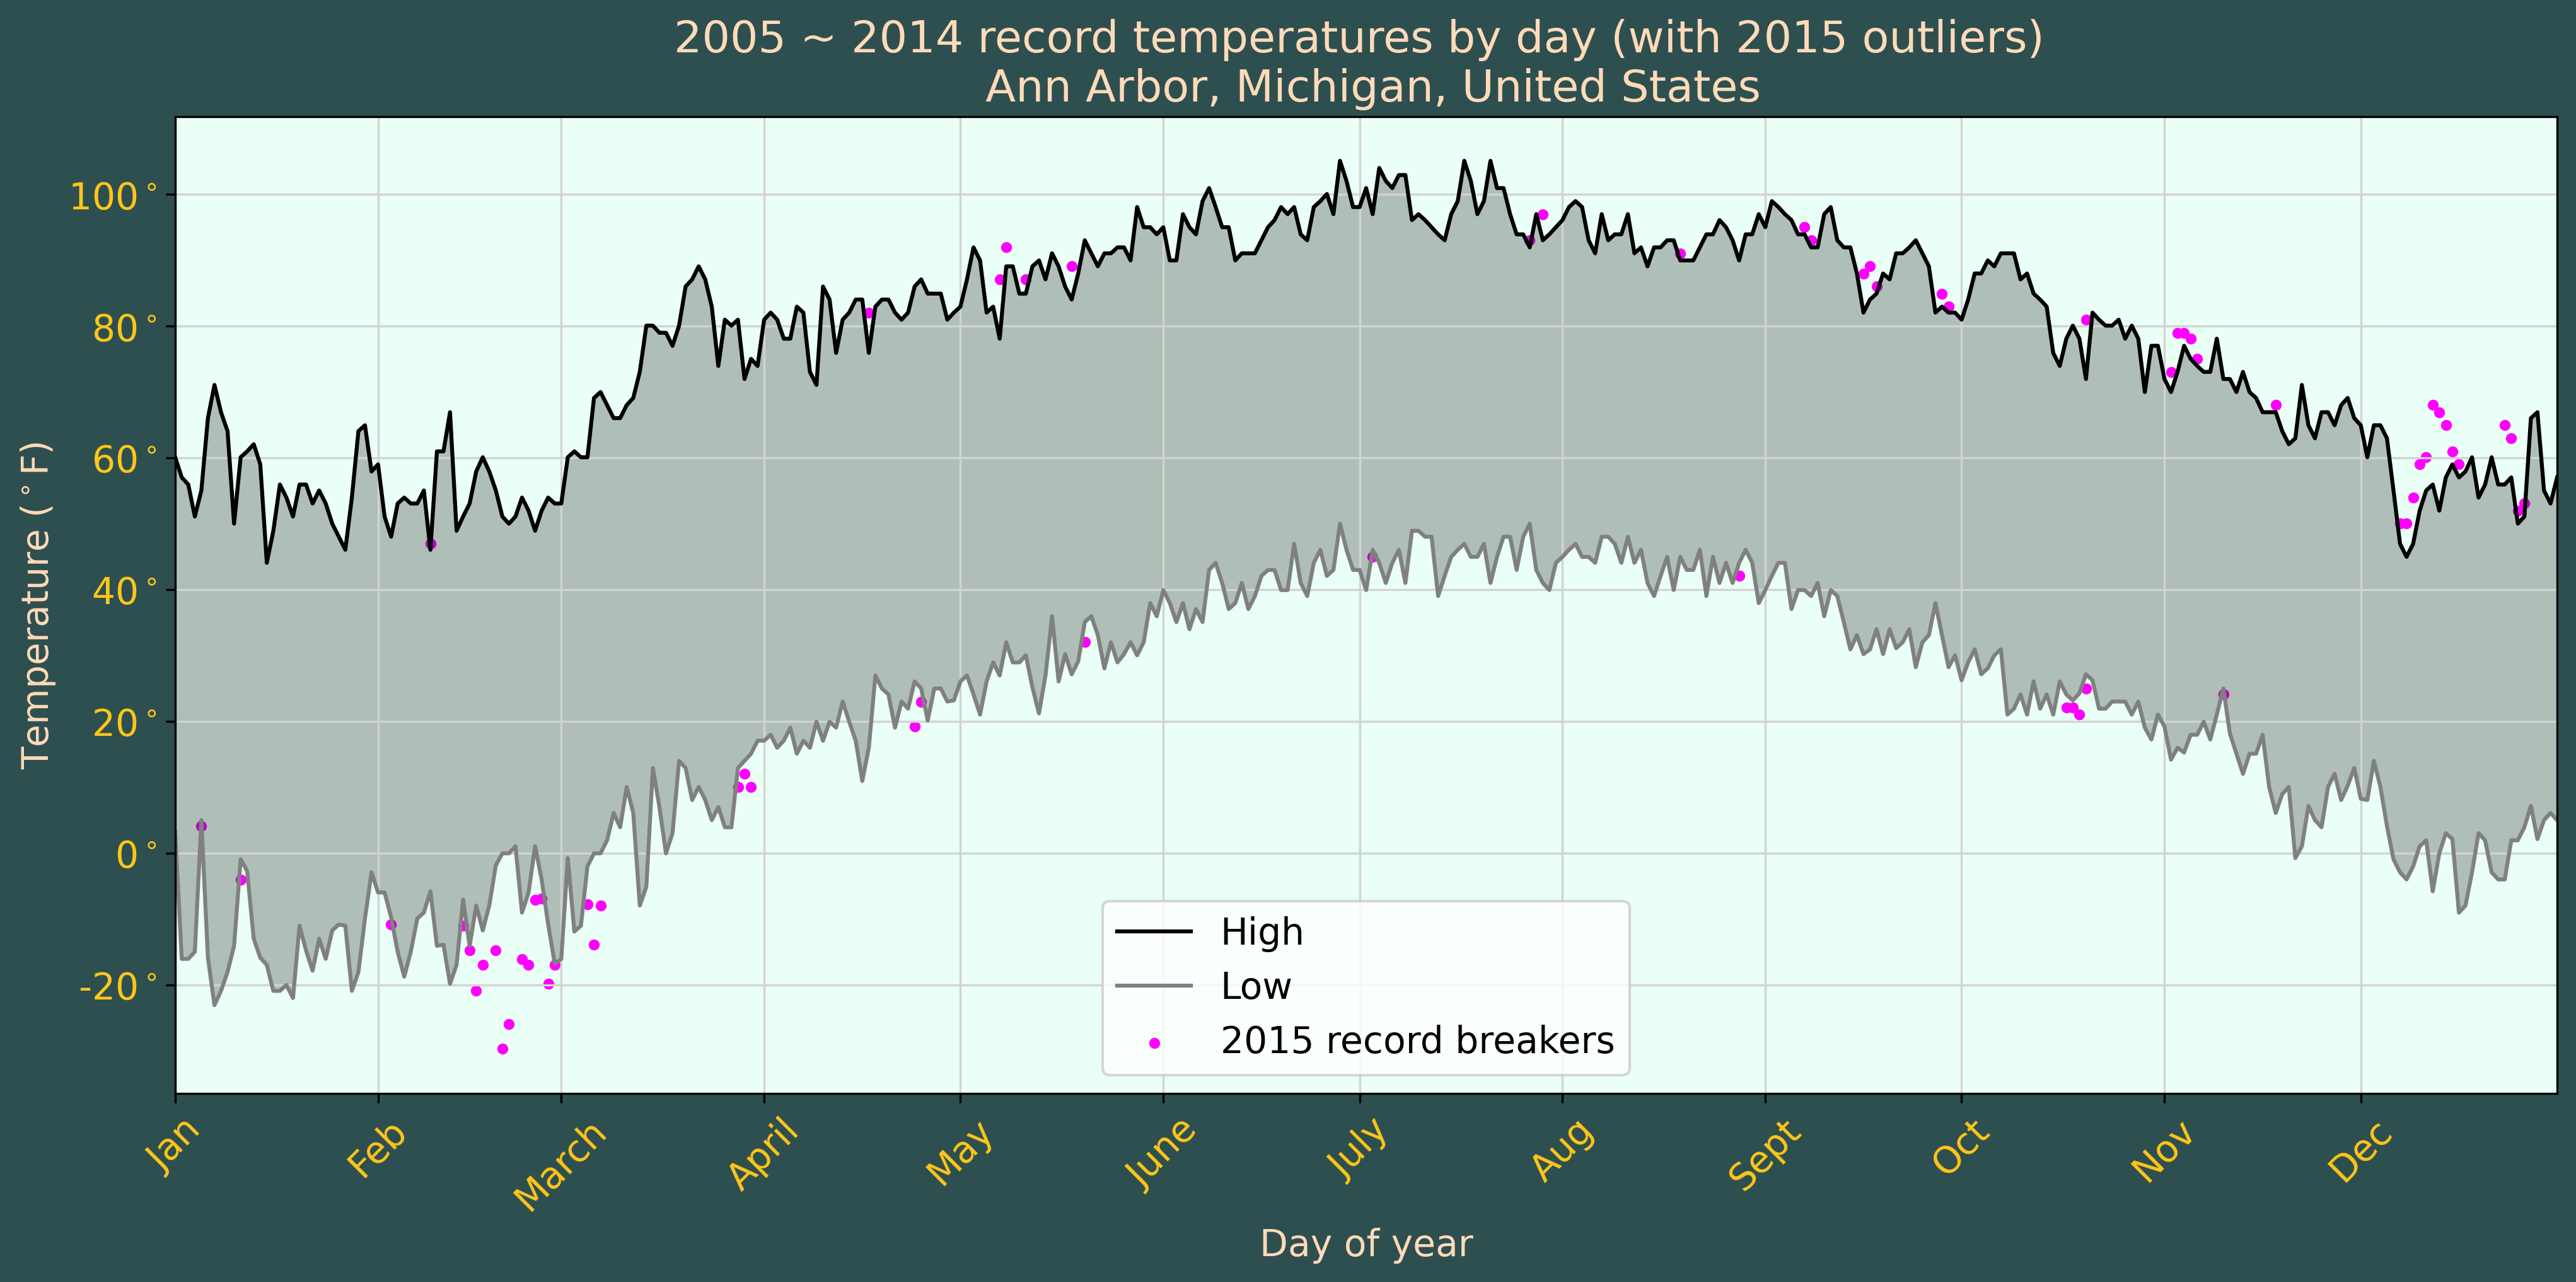

In [166]:
# Plotting Section

# set label attributes here
base_height = 7
main_title='2005 ~ 2014 record temperatures by day (with 2015 outliers)'
sub_title='Ann Arbor, Michigan, United States'
x_label_color ='peachpuff'
tick_label_color = '#ffc619'
ax_face_color = '#eafff5'
fill_between = 'black'
fill_between_alpha = .25
scatter_dot_size = 10

# plot here
xaxis = np.arange(len(temps))
plt.scatter(xaxis, temps2015['max'], label='2015 record breakers', color='magenta', s=scatter_dot_size)
plt.scatter(xaxis, temps2015['min'], color='magenta', s=scatter_dot_size, label='_Hidden label')
plt.plot(xaxis, temps['max'], label="High", color='black')
plt.plot(xaxis, temps['min'], label="Low", color='gray')

plt.legend(loc=8)
plt.xlabel('Day of year',color=x_label_color)
plt.ylabel('Temperature ($^\circ$F)',color=x_label_color)
plt.title('{} \n {}'.format(main_title,sub_title) , color=x_label_color)
plt.grid(True,color="lightgrey")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.rcParams.update({'font.size': 14, 'figure.dpi':300})
plt.fill_between(xaxis,temps['min'], temps['max'], facecolor=fill_between, alpha=fill_between_alpha)

#set x axis labels
ax = plt.gca()
ax.set_xticks([jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec,jan2])
ax.set_xticklabels(monthticklabels)
ax.set_facecolor(ax_face_color)
ax.tick_params(labelcolor=tick_label_color)
ax.margins(x=0)

# rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)


# append degree to y-axis
# Use automatic StrMethodFormatter creation 
formatter = ticker.FormatStrFormatter('%1.0f$^\circ$')
Axis.set_major_formatter(ax.yaxis, formatter)

# for file generation
fig = plt.gcf()
fig.set_size_inches(base_height * 2, base_height)
fig.patch.set_facecolor((.18, .31, .31))
fig.tight_layout()
fig.savefig(
    '/content/drive/MyDrive/resources/Course2/test.png'
    ,transparent=None
    ,facecolor=(.18, .31, .31)
    ,dpi=300
    )
    

plt.show()